In [1]:
import pickle
import pandas as pd
import partial_dependence as pdp
import numpy as np

In [2]:
root_sentiero = "../../joschi_model_original_data/wine"
dfTest = pd.read_csv(root_sentiero+"/test.csv")

ground_truth_column = "label"
features = [x for x in list(dfTest.columns) if x not in [ground_truth_column]]

dfTest = dfTest[features]

name = "rf"
fileobj = open( root_sentiero+"/"+name+".pkl", "rb" )

pickle_model = pickle.load( fileobj )

chosen_feature = "alcohol"
ch_numSamples = 100
ch_clustNumber = 10
ch_scale = np.array(pickle_model["scale"])
ch_shift = np.array(pickle_model["shift"])
model = pickle_model["model"]
labels_name = ["good\nwine","bad\nwine"]
labels_focus = labels_name[0]

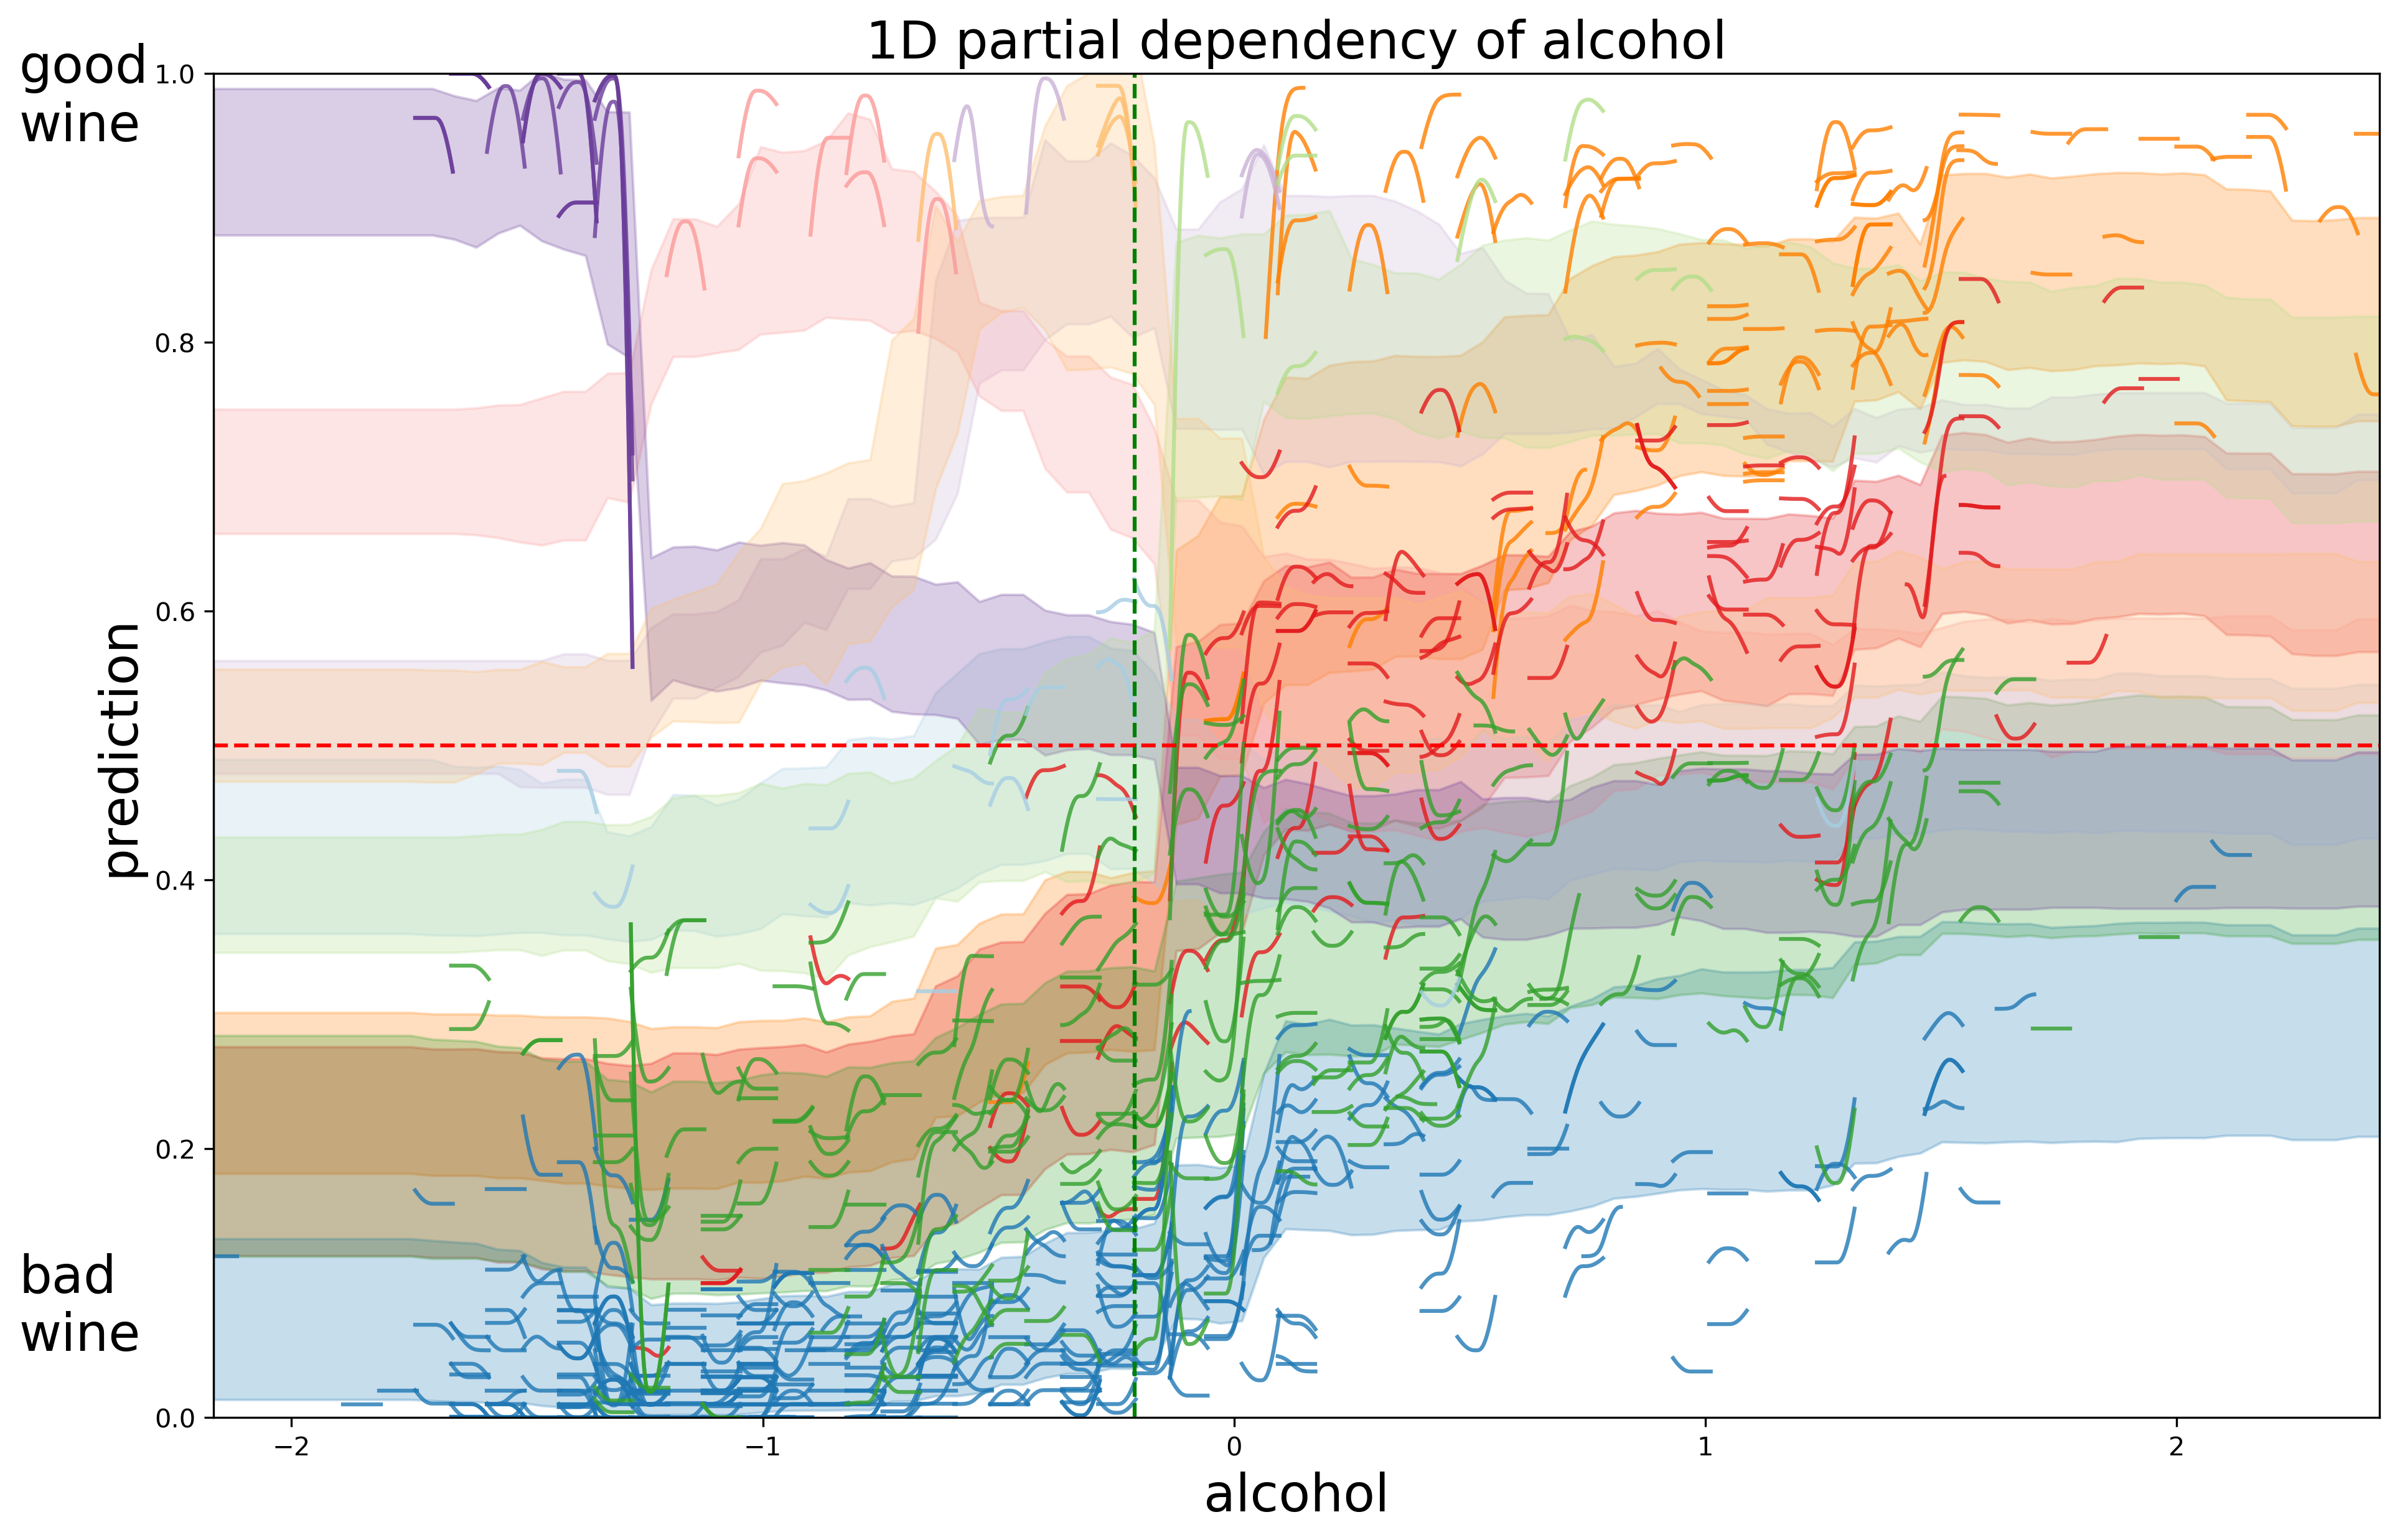

In [3]:
#using all possible default arguments
# if scale and shift are default = None 
# we have to provide directly the normalized data 

dfTest_matrix = (dfTest.as_matrix() + ch_shift)*ch_scale
normalized_df = pd.DataFrame(dfTest_matrix)
normalized_df.columns = dfTest.columns

pdp.plot(normalized_df,
             model,
             chosen_feature,
             labels_name,
             labels_focus)

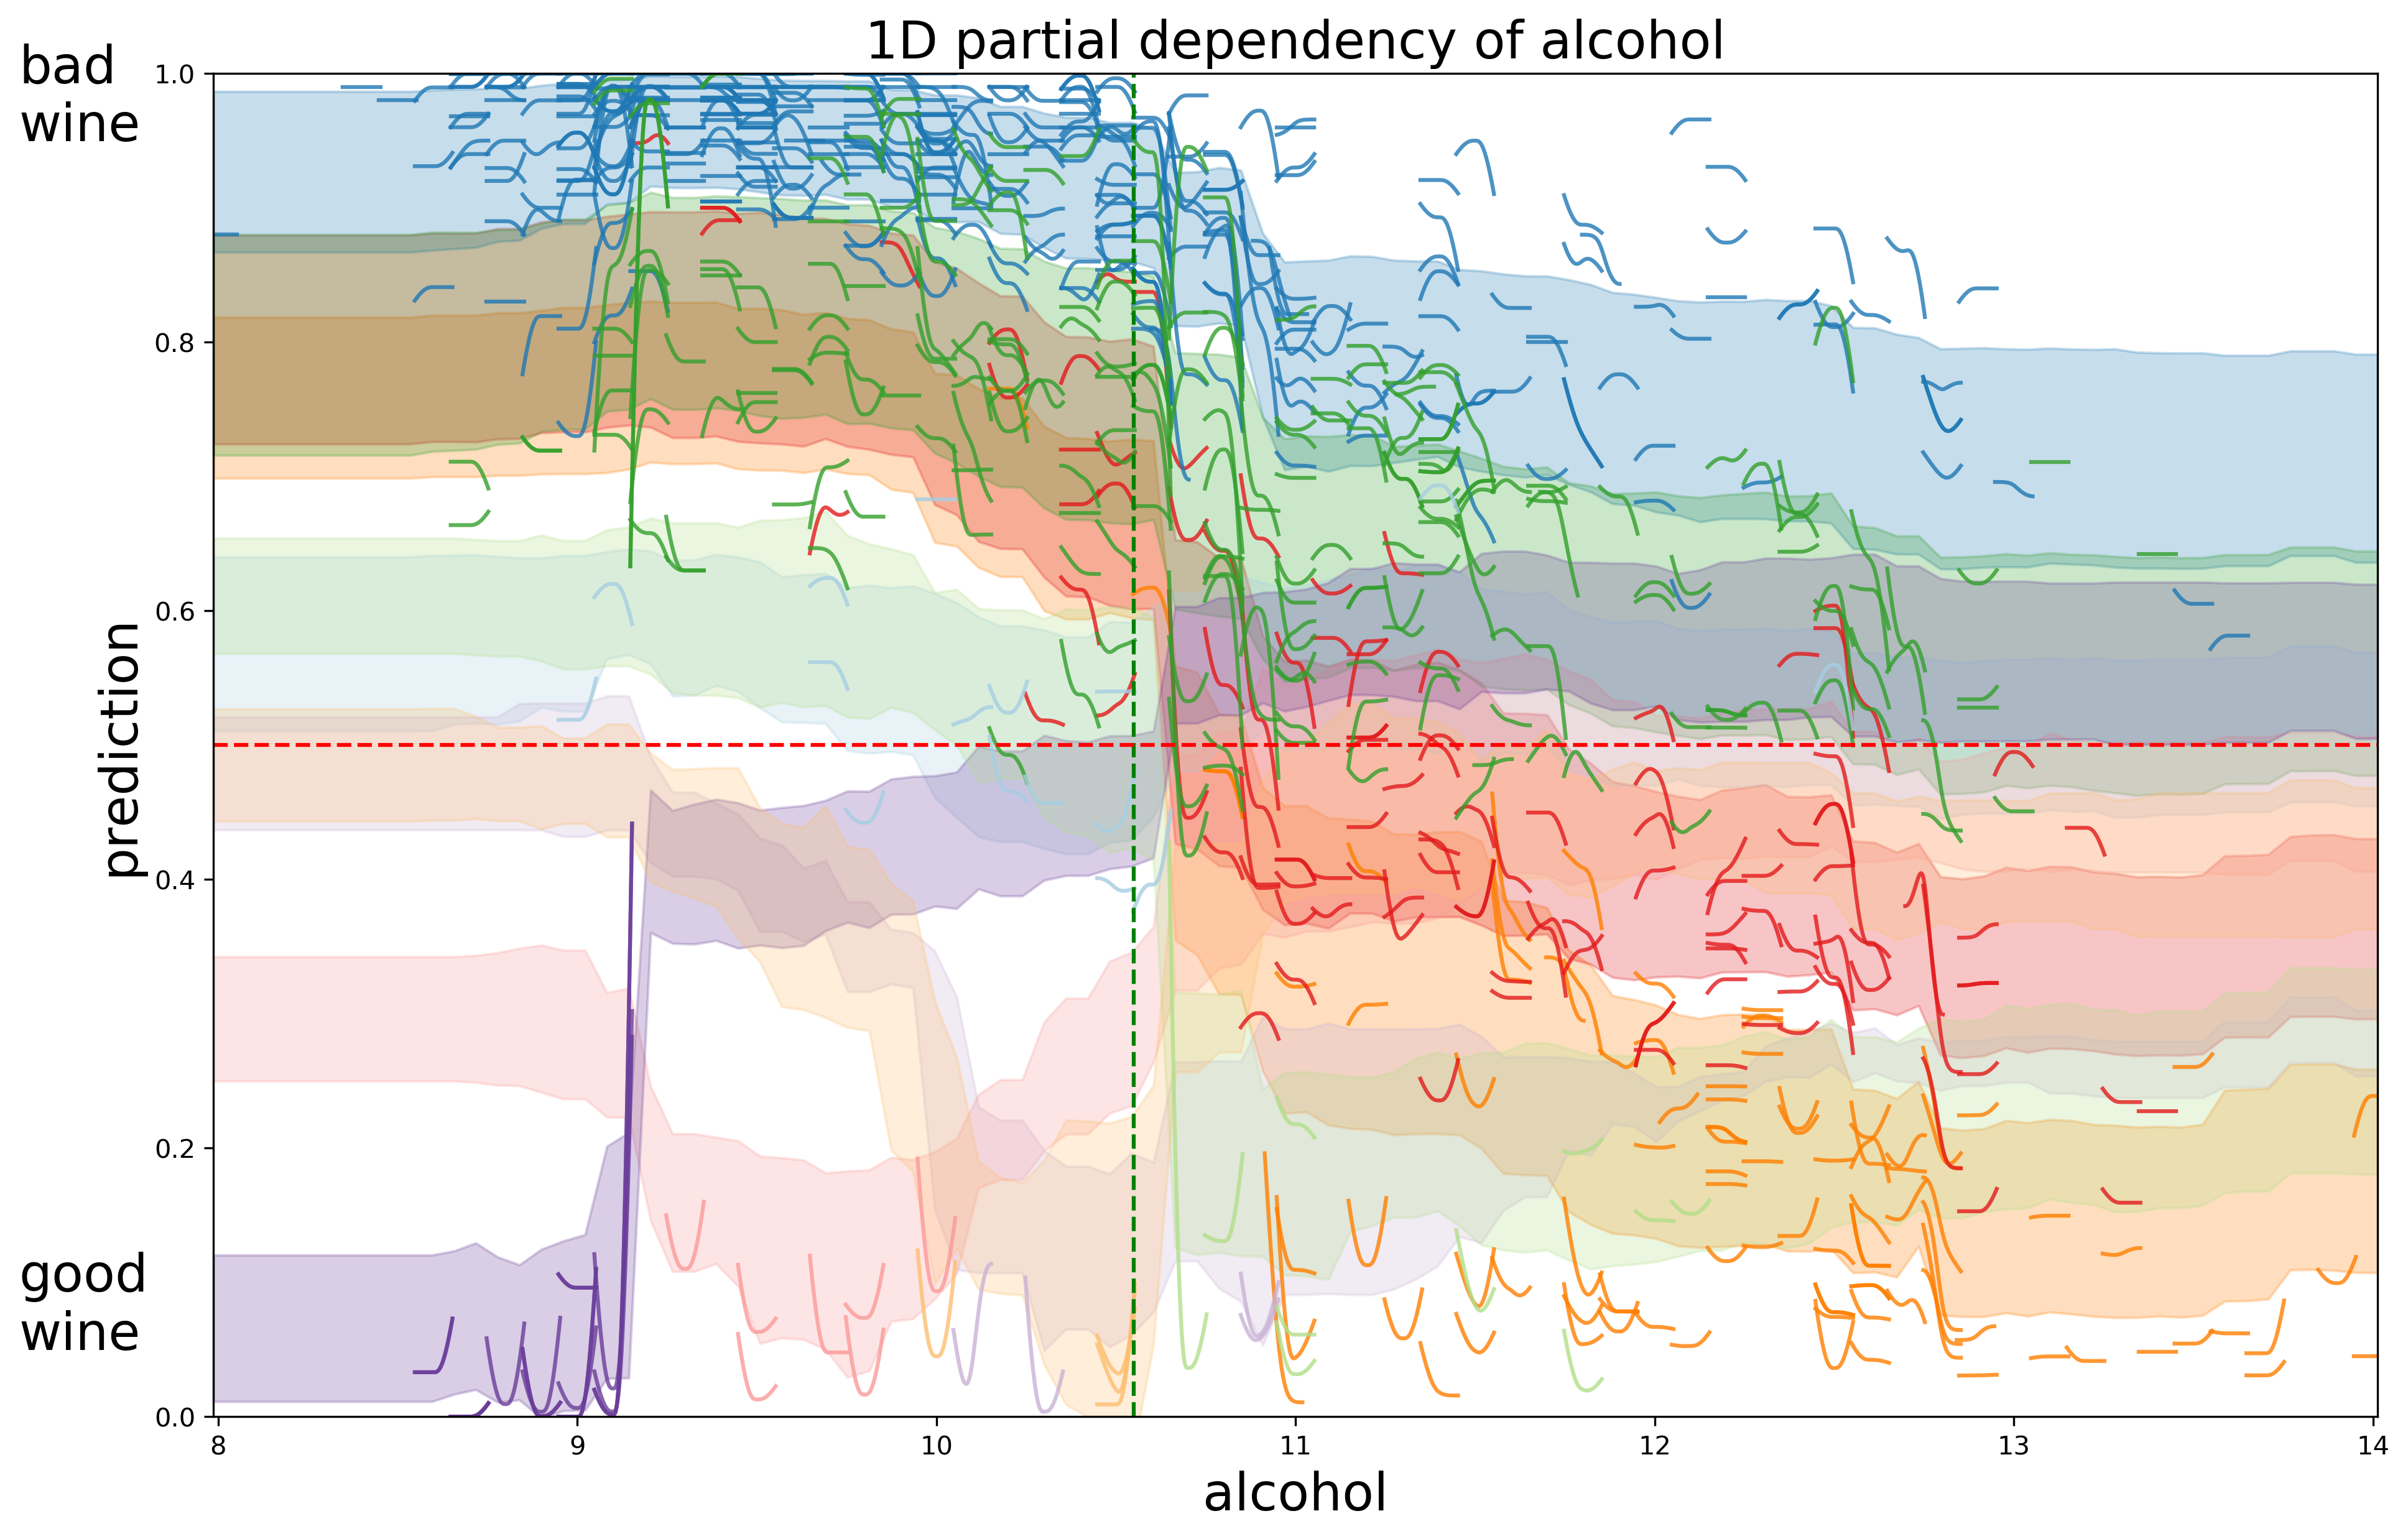

In [4]:
# using custom scale and shift to show original data values on plot
# showing here all arguments
# playing with the class_focus argument: prediction are now twoards the class bad wine

pdp.plot(dfTest,
             model,
             chosen_feature,
             labels_name,
             labels_name[1],
             ch_scale,
             ch_shift,
             ch_numSamples,
             ch_clustNumber,
             thresh = 0.5,
             lb_keogh_bool= False,
             local_curves = True, 
             compute_in_chunks = False)